<a href="https://colab.research.google.com/github/sandeep1847e/Neural_Network_1/blob/main/NNusingTorch1%20-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First neural Network**

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [36]:
class Model(nn.Module):
  #input layers
  def __init__(self,in_features=4,h1=8,h2=9,out_feature=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_feature)

  def execute(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [37]:
torch.manual_seed(41)
model=Model()

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [39]:
url= 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
data= pd.read_csv(url)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
data['species'] = data['species'].replace({'setosa':0.0,'versicolor':1.0,'virginica':2.0})
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# **training testing and splitting**

In [41]:
x=data.drop('species',axis=1)
y=data['species']


In [42]:
x = x.values
y = y.values


In [43]:
x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [44]:
from sklearn.model_selection import train_test_split
xtrain ,xtest ,ytrain ,ytest = train_test_split(x,y,test_size=0.2,random_state=41)

In [45]:
xtrain=torch.FloatTensor(xtrain)
xtest=torch.FloatTensor(xtest)
ytrain=torch.LongTensor(ytrain)
ytest=torch.LongTensor(ytest)


**error measurement**

In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# model.parameters()

In [47]:
epochs=100
losses=[]
for i in range(epochs):
  ypred = model.execute(xtrain)

  loss = criterion(ypred,ytrain)

  # tracking loss

  losses.append(loss.detach().numpy())

  if i%10==0:
    print(f'Epochs : {i} and loss : {loss}')


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epochs : 0 and loss : 1.1251550912857056
Epochs : 10 and loss : 1.0096259117126465
Epochs : 20 and loss : 0.8157405853271484
Epochs : 30 and loss : 0.585706353187561
Epochs : 40 and loss : 0.3999636471271515
Epochs : 50 and loss : 0.26768800616264343
Epochs : 60 and loss : 0.17942361533641815
Epochs : 70 and loss : 0.12151690572500229
Epochs : 80 and loss : 0.0860118493437767
Epochs : 90 and loss : 0.06520850956439972


Text(0.5, 0, 'epochs')

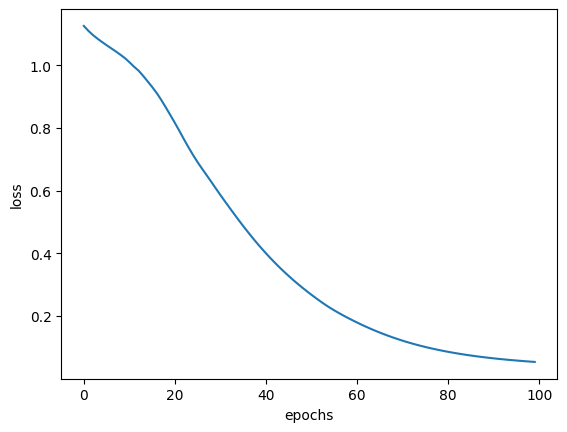

In [48]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epochs')

In [49]:
with torch.no_grad():
  yeval = model.execute(xtest)
  loss = criterion(yeval,ytest)
loss

tensor(0.1315)

In [50]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(xtest):
    yval=model.execute(data)
    print(f'{i+1}.) {str(yval)} \t {ytest[i]}')

    if yval.argmax().item()==ytest[i]:
      correct+=1
f'{correct : }correct'

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 	 0
21.) tensor([-2.6189,  4.5619,  0.8574]) 	 1
22.) tensor([-7.7412,  4.7377,  9.4199]) 	 2
23.) tensor([ 3.574

' 28correct'

In [51]:
# using model to predict on our new dataset


In [53]:

newdata=torch.tensor([[5.9,	3.0,	5.1,	1.8]])
with torch.no_grad():
  print(model.execute(newdata).argmax().item())

2


# ***saving our model for future***

In [54]:
torch.save(model.state_dict(),'iri_model.pt')

# **loading our modeule**

In [55]:
irishmodel=Model()
irishmodel.load_state_dict(torch.load('iri_model.pt'))

<All keys matched successfully>

In [56]:
irishmodel.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)